# **A Tour of the pyclep package's Ion class**

by Tom Schad 


In [1]:
import pycelp 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import os
## If you havent already set the environment variable XUVTOP for the location of the database, set it here
os.environ["XUVTOP"] = '/usr/local/ssw/packages/chianti/dbase/'

## **Initializing an Ion Object for a particular Ion**

- The primary class used for calculations with pyCELP is the Ion class.  It is automatically imported into the main package from the pyclep.ion sub-module.  With it, one can load the data for a single ion and perform calculations relevant to synthesizing the polarized emission as well as generate Stokes vectors.

- Let's start by initializing a class for the Fe XIII ion.  We aim to explore the 1074.6 and 1079.8 nm coronal emission lines.  When you initialize the Ion class, pycelp will read the [Chianti](https://www.chiantidatabase.org/) database for the given atom.  The default to is read all level and collisional information available.  For the Fe XIII ion, there are 749 energy levels.  Once the data is read, pyclep will then pre-calculate as many terms (or factors) in the statistical equilbrium equations as possible.  This includes all calculations of the relevant wigner coefficients.  As such, the initialization can take some time.  

- Here we will restrict the number of levels we use in our calculations to make it faster.  It is up to the user to decide how many levels are appropriate for a given atom.  See Schad & Dima (2020) for more details.  

<div class="alert alert-warning" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Note:</strong>  If this is your first time running pycelp, initization may take longer.  pycelp uses numba @njit compilation with caching enabled.  Once the various functions are run once, the compiled functions will be in the memory for this session and available in the cache for later.  Thus, subsequent executions will be much faster.                  
        </div>   
    </div> 
</div>

In [2]:
fe13 = pycelp.Ion('fe_13',nlevels = 50)

 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.wgfa
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.scups
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.psplups
 using default abundances: /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 reading:  /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 testing default file: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 reading:  /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors


Now, we can view the representation of the Ion by simplying return the class instance name directly

In [3]:
fe13

pyCELP Ion class
    ---------------------
    Ion Name: fe_13
    Number of energy levels included: 50
    Number of SEE equations: 142
    Number of Radiative Transitions: 366
    Ionization Equilbrium Filename: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq

We see that there at 50 energy levels included.  The number of statistical equilbrium equations in the statistical spherical tensor representation is 142; thus, the rate matrix will be 142 x 142 in size.  The number of radiative transitions included is 366. 

We can look at the first 10 radiative transitions using the show_lines method. 

In [4]:
fe13.show_lines(10)

 Index -- WV_VAC [A] -- WV_AIR [A] -- TRANSITION
0 10749.105 10746.153 3s2 3p2 3P1  -->  3s2 3p2 3P0
1 10800.77 10797.804 3s2 3p2 3P2  -->  3s2 3p2 3P1
2 5387.438 5385.939 3s2 3p2 3P2  -->  3s2 3p2 3P0
3 2579.54 2578.768 3s2 3p2 1D2  -->  3s2 3p2 3P1
4 3388.911 3387.939 3s2 3p2 1D2  -->  3s2 3p2 3P2
5 2080.313 2079.65 3s2 3p2 1D2  -->  3s2 3p2 3P0
6 1370.815 1370.815 3s2 3p2 1S0  -->  3s2 3p2 3P2
7 2301.957 2301.248 3s2 3p2 1S0  -->  3s2 3p2 1D2
8 1216.428 1216.428 3s2 3p2 1S0  -->  3s2 3p2 3P1
9 600.405 600.405 3s 3p3 5S2  -->  3s2 3p2 1D2


### **Access to raw Chianti Database Information**

- Most variables in the Ion class are currently in public scope.  For example, the level information read from Chianti is in the dictionary elvl_data.  We can look at the available keys here.  pycelp uses much of this information for its calculations but it does not typically use this dictionary directly, though it may in the future.  Reading the Ion class source code can helpful if interested.  

- Similar dictionaries are available for the radiation transitions (wgfa_data), electron collisional data (scups_data), and proton collisional data (splups_data). 

In [5]:
print(' ')
print(' elvl_data keys:')
print(' ')
print(fe13.elvl_data.keys())
print(' ')
print('Example...print energies and configurations for the first 5 levels')
print(' ')
print(' Chianti level index  ---   energy [' + fe13.elvl_data['energy_units'] + '] --- level configuration') 
for lev in range(5):
    print(fe13.elvl_data['index'][lev],' ',fe13.elvl_data['energy'][lev],'  ',fe13.elvl_data['full_level'][lev])

 
 elvl_data keys:
 
dict_keys(['ion_name', 'ion_z', 'ion_n', 'filename', 'version', 'reference', 'index', 'conf', 'conf_latex', 'conf_index', 'term', 'term_latex', 'level', 'level_latex', 'full_level', 'full_level_latex', 'label', 'mult', 's', 'l', 'l_sym', 'j', 'j_str', 'parity', 'parity_str', 'weight', 'obs_energy', 'theory_energy', 'energy', 'energy_units'])
 
Example...print energies and configurations for the first 5 levels
 
 Chianti level index  ---   energy [cm^-1] --- level configuration
1   0.0    3s2 3p2 3P0
2   9303.1    3s2 3p2 3P1
3   18561.699    3s2 3p2 3P2
4   48069.699    3s2 3p2 1D2
5   91511.0    3s2 3p2 1S0


#### **Converting to pandas dataframe**

- If you have pandas installed, you can also view the level information and the radiative transition information as a dataframe as follows:

In [6]:
energy_levels_df = fe13.energy_levels_to_dataframe()
energy_levels_df[0:10]  ## show first ten levels only 

,Index,Ion_name,Ion_z,Config,Conf Idx,Term,Level,Full Level,Spin Mult,S,L,Orbital,J,Lande g,Parity,Parity Str,Stat. Weight,Obs Energy [cm^-1],Theory Energy [cm^-1],Energy [cm^-1]
0,1,fe_13,26,3s2 3p2,1,3P,3P0,3s2 3p2 3P0,3,1.0,1,P,0.0,0.000000,0,e,1.0,0.000,0.0,0.000
1,2,fe_13,26,3s2 3p2,1,3P,3P1,3s2 3p2 3P1,3,1.0,1,P,1.0,1.500000,0,e,3.0,9303.100,9303.0,9303.100
2,3,fe_13,26,3s2 3p2,1,3P,3P2,3s2 3p2 3P2,3,1.0,1,P,2.0,1.500000,0,e,5.0,18561.699,18562.0,18561.699
3,4,fe_13,26,3s2 3p2,1,1D,1D2,3s2 3p2 1D2,1,0.0,2,D,2.0,1.000000,0,e,5.0,48069.699,48070.0,48069.699
4,5,fe_13,26,3s2 3p2,1,1S,1S0,3s2 3p2 1S0,1,0.0,0,S,0.0,0.000000,0,e,1.0,91511.000,91511.0,91511.000
5,6,fe_13,26,3s 3p3,2,5S,5S2,3s 3p3 5S2,5,2.0,0,S,2.0,2.000000,1,o,5.0,214624.000,214624.0,214624.000
6,7,fe_13,26,3s 3p3,2,3D,3D1,3s 3p3 3D1,3,1.0,2,D,1.0,0.500000,1,o,3.0,287205.000,282051.0,287205.000
7,8,fe_13,26,3s 3p3,2,3D,3D2,3s 3p3 3D2,3,1.0,2,D,2.0,1.166667,1,o,5.0,287356.000,282222.0,287356.000
8,9,fe_13,26,3s 3p3,2,3D,3D3,3s 3p3 3D3,3,1.0,2,D,3.0,1.333333,1,o,7.0,290180.000,290180.0,290180.000
9,10,fe_13,26,3s 3p3,2,3P,3P0,3s 3p3 3P0,3,1.0,1,P,0.0,0.000000,1,o,1.0,328927.000,324378.0,328927.000


In [7]:
rad_trans_df = fe13.rad_transitions_to_dataframe()
rad_trans_df[0:10]  ## show first ten transitions only

,Lambda Vac [A],Lambda Air [A],UppLev Idx,LowLev Idx,Upper Level,Lower Level,geff [LS],D coeff,E coeff,Einstein A
0,10749.105137,10746.153423,2,1,3s2 3p2 3P1,3s2 3p2 3P0,1.50,1.000000,1.060660e+00,14.00000
1,10800.770181,10797.804402,3,2,3s2 3p2 3P2,3s2 3p2 3P1,1.50,0.591608,6.274950e-01,9.88000
2,5387.437863,5385.938558,3,1,3s2 3p2 3P2,3s2 3p2 3P0,3.00,-0.000000,-0.000000e+00,0.00637
3,2579.540186,2578.767826,4,2,3s2 3p2 1D2,3s2 3p2 3P1,0.75,0.591608,1.861901e-16,60.30000
4,3388.911482,3387.938955,4,3,3s2 3p2 1D2,3s2 3p2 3P2,1.25,-0.591608,-8.366600e-01,73.70000
5,2080.312589,2079.649941,4,1,3s2 3p2 1D2,3s2 3p2 3P0,2.00,-0.000000,-0.000000e+00,0.00400
6,1370.815054,1370.815054,5,3,3s2 3p2 1S0,3s2 3p2 3P2,3.00,-0.000000,-0.000000e+00,3.76000
7,2301.956841,2301.247695,5,4,3s2 3p2 1S0,3s2 3p2 1D2,2.00,-0.000000,-0.000000e+00,7.84000
8,1216.428105,1216.428105,5,2,3s2 3p2 1S0,3s2 3p2 3P1,1.50,0.000000,-0.000000e+00,970.00000
9,600.404789,600.404789,6,4,3s 3p3 5S2,3s2 3p2 1D2,1.50,-0.591608,9.309503e-17,183000.00000


## **Example calculation of the statistical equilibrium**

Now, lets do a single calculation of the statistical equilbrium.  The default method for this (currently) is called calc_rho_sym, which excepts an electron density, a temperature, a height above the solar surface and a magnetic field inclination.  The code currently assumes the proton temperature equals the electron temperature.  The proton density is set to 0.85 times the electron density.  The '_sym' part of the method name refers to the use of the cylindrically symmetric quiet sun radiation field for the photo excitation.

The relevant geometry of pyCELP is shown in the figure below, which is from [Dima & Schad (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...889..109D/abstract).  It shows the angular coordinates between three vectors passing through a point of emission in the corona: the outward radial direction (R), magnetic field (B), and line of sight (k). 

Local "Solar" Frame Angles: 

$\theta_{B}$ :: the inclination of the magnetic field in the local solar frame relative to the radial direction. \
$\phi_{B}$ :: the azimuth of the magnetic field in the local solar frame measured from the plane containing the radial direction and line-of-sight. \

Line-of-Sight Frame Angles: 

$\Theta_{B}$ :: the inclination of the magnetic field relative to the line-of-sight direction. \
$\gamma_{B}$ :: the azimuth angle of the projected magnetic field in a plane perpendicular to the line of sight measured clockwise toward the reference direction for linear polarization (r.d.l.p.). 


<center>
<img src="pycelp_coordinate_system.png" alt="Drawing" class="center" style="width: 600px;"/>
</center> 

In [8]:
electron_density      = 1e8                  ## cm^-3
electron_temperature  = fe13.get_maxtemp()   ## Kelvin 
print(' Max temp is : ', electron_temperature, ' log T: ', np.log10(electron_temperature))
height = 0.1                ## solar radius units above the photosphere 
thetaBlocal = 10.   ## degrees 

## EXECUTE THE STATISTICAL EQUILIBRIUM CALCULATION 
fe13.calc_rho_sym(electron_density, electron_temperature, height, thetaBlocal, include_limbdark=True, include_protons=True)

 Max temp is :  1676832.9368110066  log T:  6.224489795918367


Having executed the calc_rho_sym method, the statistical equilibrium equations have now been solved and the elements of the atomic density matrix are now available.  The total rate matrix in the spherical tensor representation is given in the see_matrix variables.  "SEE" refers to "Statistical Equilibrium Equations".  Each row of this matrix corresponds to a particular energy level and moment order K, which is recorded in the see_lev and see_k variables. 

In [9]:
print(fe13.see_matrix.shape,fe13.see_lev.shape,fe13.see_k.shape)
print(fe13.get_upper_level_alignment(10747.))

(142, 142) (142,) (142,)
0.09336483969242176


One can view the spherical tensor matrix elements directly in the rho variable, which has a shape of (nlevels x the maximum order K). Q = 0 on account of the no coherence hypothesis.  Thus, rho has already been reshaped using the index variables above. Associated with the index variables is an array of weights used to normalize the total populations to unity.  You can check the solution by ensuring the total population is 1 as follows.  A method may be created to do this directly. 

In [10]:
print(' Shape of rho: ',fe13.rho.shape)
## here is where you can calculate the trace of the equations 
print(' sum of populations: ',  np.sum(fe13.rho[:,0]*fe13.weight[fe13.weight != 0]))

 Shape of rho:  (50, 11)
 sum of populations:  0.9999999999999999


## **Single Intensity Emission Coefficient Calculation using Ion class method**

At this point we have access to all the information we need to calculate the polarized emission coefficients.

The emission coefficient for Stokes I is given in Equation 3 of Schad & Dima (2020):  https://rdcu.be/b5J2X


$$
\epsilon_I(\lambda,\vec{\Omega}_{0}) = \frac{hv}{4\pi} N_{\alpha_{u} J_{u}}A_{\alpha_{u} J_{u} \rightarrow \alpha_{\ell} J_{\ell}}
     \left[1 + \frac{3}{2\sqrt{2}}D\sigma^2_0\left(\cos^2{\Theta_B} - \frac{1}{3}\right)\right]\phi(\lambda-\lambda_0)
$$

Here we assume the line is not resolved and instead calculate the line-integrated emission coefficient

In [11]:
## select the wavelength of the desired transition (Angstrom in Air) 
## For convenience, this wavelength need not be exact.  But for the comparisons below, we need 
## the precision wavelength, so there's a method to grab that
wvair = 10747  
wvair = fe13.get_wvAirTrue(wvair)
print(wvair)

10746.15342348271


Use the calc_Iemiss method to get the line integrated intensity emission coefficent for this line.  Note the dependence on thetaBLOS in above equation.  This requires one to define the **LINE-OF-SIGHT** inclination angle $\Theta_{B}$.  The default is to use the Van Vleck angle (~54.74 deg) where the term in the brackets goes to 1 and the emission coefficent reduces to the scalar case.  

In [12]:
epsI = fe13.calc_Iemiss(wvair, thetaBLOS=54.735610317245346)   ## thetaBLOS = Van Vleck angle [default] 

units = r'photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$'
print(epsI,' ',units)

 upper_lev aligment:  0.09336483969242176
2.760552215946346e-09   photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$


## **Polarized Emission Coefficients Calculation using Ion class method**

The polarized emission coefficients are given in Equations 6,7, and 8 of [Schad & Dima (2020)](https://rdcu.be/b5J2X)

These pertain to a particular geometry where the reference direction of the linear polarization is parallel to the LOS projected magnetic field orientation.   The line profile is given by a normal distribution $\phi$ and its derivative $\phi'$.  Here we only calculate the line-integrated coefficients.

$$
\epsilon_Q(\lambda,\vec{\Omega}_{0}) =  \frac{3}{2\sqrt{2}}\frac{hv}{4\pi} N_{\alpha_{u} J_{u}}A_{\alpha_{u} J_{u} \rightarrow \alpha_{\ell} J_{\ell}} D\sigma^2_0 \sin^2{\Theta_{B}}{\ }\phi(\lambda-\lambda_0)
$$

$$
\epsilon_U(\lambda,\vec{\Omega}_{0}) = 0
$$

$$
\epsilon_V(\lambda,\vec{\Omega}_{0}) = -\frac{\lambda^{2}}{c}\frac{hv}{4\pi} N_{\alpha_{u} J_{u}}A_{\alpha_{u} J_{u} \rightarrow \alpha_{\ell} J_{\ell}}\cos{\Theta_{B}}\nu_{L}[\bar{g} + E\sigma^2_0]\phi'(\lambda-\lambda_0)
$$

In [13]:
magnetic_field_amplitude  = 100.   ## Gauss 
thetaBLOS    = 45.  ## [degrees] inclination angle of the magnetic field IN THE LINE-OF-SIGHT FRAME 
azimuthBLOS  = 0.   ## [degrees] azimuthal angle of the magnetic field IN THE LINE-OF-SIGHT FRAME (default == 0)

## Calculate line-integrated emission coefficents 
epsI,epsQ,epsU,epsV = fe13.calc_PolEmissCoeff(wvair, magnetic_field_amplitude,  thetaBLOS, azimuthBLOS)

iqu_units = 'photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$'
v_units   =  'photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$ Angstrom^{-1}'
print(' epsI : ',epsI,'    ',iqu_units)
print(' epsQ : ',epsQ,'    ',iqu_units)
print(' epsU : ',epsU,'    ',iqu_units)
print(' epsV : ',epsV,'    ',v_units)

 upper_lev aligment:  0.09336483969242176
 epsI :  2.8061143788971623e-09      photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$
 epsQ :  1.3668648885244928e-10      photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$
 epsU :  0.0      photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$
 epsV :  -1.6837157508192478e-11      photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$ Angstrom^{-1}


## **Calculate Stokes spectra**

- The calc_stokesSpec method can generate Stokes spectra with the current statistical equilibrium solution and for a specified magnetic field vector.  See method documentation for more details. 
- Note that the units here indicate that one must multiply by the path length in cm to get true Stokes vectors in spectral radiances units (i.e. photons cm$^{-2}$ s$^{-1}$ arcsec$^{-2}$ Angstrom$^{-1}$)

In [14]:
wvvec,stokes = fe13.calc_stokesSpec(wvair, magnetic_field_amplitude,  thetaBLOS, azimuthBLOS)

 upper_lev aligment:  0.09336483969242176


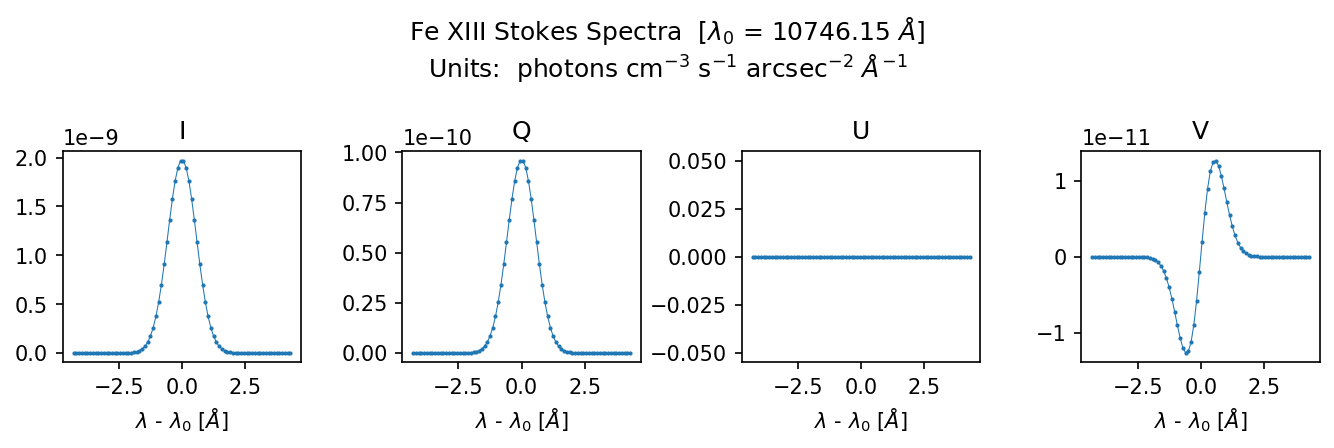

In [15]:
fig,ax = plt.subplots(1,4,figsize = (9,3),sharex=True)
ax = ax.flatten()
labels = 'I','Q','U','V'
for n in range(4): 
    ax[n].plot(wvvec - wvair,stokes[:,n],'.-',lw = 0.5,markersize = 2)
    ax[n].set_title(labels[n])
    ax[n].set_xlabel(r'$\lambda$ - $\lambda_0$ [$\AA$]')
fig.suptitle('Fe XIII Stokes Spectra  [' + r'$\lambda_0$ = ' + str(np.round(wvair,2)) + r' $\AA$' + ']\n' + 
             r'Units:  photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$ $\AA^{-1}$')
fig.tight_layout()

### **Compare the above Stokes V to the Weak-Field-Approximation**

Using Equations 9.80 and 3.14 from Landi Degl'Innocenti & Landolfi (2004) 

$$
V(\lambda)=-\Delta \lambda_{B} \bar{g} \cos \theta \frac{\partial I}{\partial \lambda}
$$
where
$$
\Delta \lambda_{B}=4.6686 \times 10^{-10} \lambda_{0}^{2} B
$$
where $\Delta \lambda_{B}$ is in mÅ, $\lambda_{0}$ in Å, and $B$ in $\mathrm{G}$.

Text(0.5, 0, 'Wavelength [$\\AA$]')

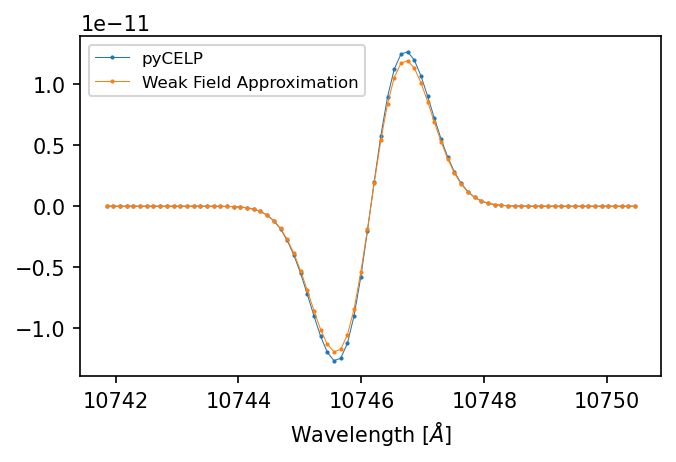

In [16]:
wvvac = fe13.get_wvVacTrue(wvair)
dlambdaB = 4.6686e-10 * (wvvac**2) * magnetic_field_amplitude  / 1000. 
geff = fe13.get_geff(wvair)
V_WFA = - dlambdaB * fe13.get_geff(wvair) * np.cos(np.deg2rad(thetaBLOS)) * np.gradient(stokes[:,0],wvvec) 

plt.figure(figsize = (5,3))
plt.plot(wvvec,stokes[:,3],'.-',label = 'pyCELP',lw = 0.5,markersize = 2)
plt.plot(wvvec,V_WFA,'.-',label = 'Weak Field Approximation',lw = 0.5,markersize = 2)
plt.legend(fontsize = 8)
plt.xlabel(r'Wavelength [$\AA$]')

<div class="alert alert-info" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Note:</strong>  In the case above, the pyCELP calculation does not match the Weak Field Approximation.  Why?  Well, this is due to the role of atomic alignment on both Stokes I and V in the case where the scattering polarization is taken into account.  We can ensure the pyCELP calculation agrees with the weak field approximation by doing calculations that enforce the atomic alignment to be zero.  We do this in the next section.
        </div>   
    </div> 
</div>

## **The case of zero atomic alignment**

- Let's redo the above Stokes V comparison for the case of zero atomic alignment, which is only guaranteed when $\theta_{B}$ equals the Van Vleck angle.

 
Upper Level Alignment for 10747A transition:  -5.397711973811265e-18
 
 upper_lev aligment:  -5.397711973811265e-18
 epsI :  2.762009968899411e-09      photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$
 epsQ :  -7.906444265690025e-27      photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$
 epsU :  0.0      photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$
 epsV :  -1.5802767151254632e-11      photons cm$^{-3}$ s$^{-1}$ arcsec$^{-2}$ Angstrom^{-1}
 upper_lev aligment:  -5.397711973811265e-18


Text(0.5, 0, 'Wavelength [$\\AA$]')

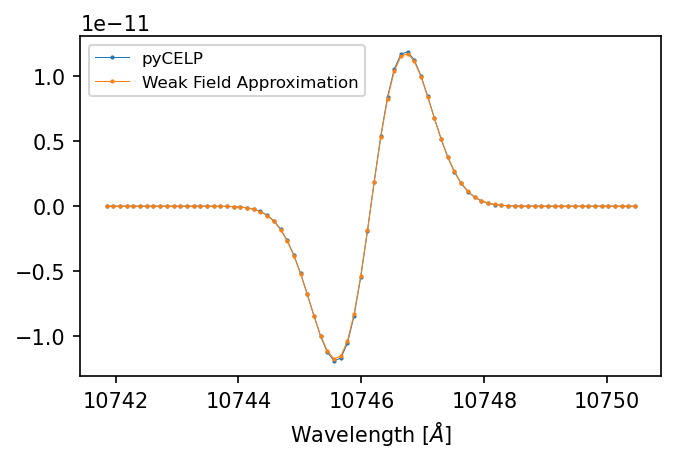

In [17]:
vanVleckDeg =  np.rad2deg(np.arccos(1./np.sqrt(3.))) 
thetaBlocal = vanVleckDeg

fe13.calc_rho_sym(electron_density, electron_temperature, height, thetaBlocal, include_limbdark=True, include_protons=True)

print(' ')
print('Upper Level Alignment for 10747A transition: ',fe13.get_upper_level_alignment(10747.))
print(' ') 

magnetic_field_amplitude  = 100.   ## Gauss 
thetaBLOS    = 45.  ## [degrees] inclination angle of the magnetic field IN THE LINE-OF-SIGHT FRAME 
azimuthBLOS  = 0.   ## [degrees] azimuthal angle of the magnetic field IN THE LINE-OF-SIGHT FRAME (default == 0)

## Calculate line-integrated emission coefficents 
epsI,epsQ,epsU,epsV = fe13.calc_PolEmissCoeff(wvair, magnetic_field_amplitude,  thetaBLOS, azimuthBLOS)
print(' epsI : ',epsI,'    ',iqu_units)
print(' epsQ : ',epsQ,'    ',iqu_units)
print(' epsU : ',epsU,'    ',iqu_units)
print(' epsV : ',epsV,'    ',v_units)

wvvec,stokes = fe13.calc_stokesSpec(wvair, magnetic_field_amplitude,  thetaBLOS, azimuthBLOS)

wvvac = fe13.get_wvVacTrue(wvair)
dlambdaB = 4.6686e-10 * (wvvac**2) * magnetic_field_amplitude  / 1000. 
geff = fe13.get_geff(wvair)
V_WFA = - dlambdaB * fe13.get_geff(wvair) * np.cos(np.deg2rad(thetaBLOS)) * np.gradient(stokes[:,0],wvvec) 

plt.figure(figsize = (5,3))
plt.plot(wvvec,stokes[:,3],'.-',label = 'pyCELP',lw = 0.5,markersize = 2)
plt.plot(wvvec,V_WFA,'.-',label = 'Weak Field Approximation',lw = 0.5,markersize = 2)
plt.legend(fontsize = 8)
plt.xlabel(r'Wavelength [$\AA$]')

In [22]:
raise

RuntimeError: No active exception to reraise

In [26]:
self = fe13 
wv_air = wvair 

magnetic_field_amplitude  = 100.   ## Gauss 
thetaBLOS    = 45.  ## [degrees] inclination angle of the magnetic field IN THE LINE-OF-SIGHT FRAME 
azimuthBLOS  = 0.   ## [degrees] azimuthal angle of the magnetic field IN THE LINE-OF-SIGHT FRAME (default == 0)

ww = np.argmin(np.abs(self.wv_air - wv_air))

if ((self.wv_air[ww] - wv_air)/wv_air > 0.05):
    print(' warning: requested wavelength for calculation does have a good match')
    print(' requested: ', wv_air)
    print(' closest:   ', self.wv_air[ww])
    raise

## convert to radians 
thetaBLOS = np.deg2rad(thetaBLOS) 
azimuthBLOS = np.deg2rad(azimuthBLOS)

## get transition and level population information 
EinsteinA = self.a_up2low[ww]  ## Transition probability 
Dcoeff = self.Dcoeff[ww]     ## Atomic parameters D and E for the line
Ecoeff = self.Ecoeff[ww]   ## Atomic parameters D and E for the line 
geff = self.geff[ww]    ## get Lande geff in LS coupline 
upplev = self.rupplev[ww]   ## index of radiative transition upper level 
Jupp = self.qnj[upplev]     ## Upper level angular momentum 
upper_lev_rho00 = self.rho[upplev,0] ## Get the Q=0,K=0 atomic density matrix element (stat. tensor)
upper_lev_pop_frac =  np.sqrt(2.*Jupp+1)*upper_lev_rho00  ## Calculate population in standard representation 
upper_lev_alignment = self.rho[upplev,2] / self.rho[upplev,0]  ## Calculate the alignment value 
print(' upper_lev aligment: ',upper_lev_alignment)
total_ion_population = self.totn        
ALARMOR = 1399612.2*magnetic_field_amplitude    ## Get Larmor frequency in units of s^-1 

## scaling coefficent for the Stokes V emission coefficient 
wv_vac_cm = self.alamb[ww] * 1.e-8 
hh = 6.626176e-27  ## ergs sec (planck's constant);
cc = 2.99792458e10 ## cm s^-1 (speed of light)
Vscl = - (wv_vac_cm)**2   / cc  * 1.e8  ## units of Angstrom * s 
hnu = hh*cc / (self.alamb[ww]/1.e8)

## Common coefficent related to populations        
C_coeff = hnu/4./np.pi * EinsteinA * upper_lev_pop_frac * total_ion_population
epsI = C_coeff * (1. + 3./(2.*np.sqrt(2.)) * (np.cos(thetaBLOS)**2 - (1./3.)  )   )
epsQ = C_coeff*(3./(2.*np.sqrt(2.)))*(np.sin(thetaBLOS)**2)*Dcoeff*upper_lev_alignment
epsU = 0
epsV = Vscl * C_coeff*np.cos(thetaBLOS)*ALARMOR*(geff + Ecoeff*upper_lev_alignment)

## rotate for the azimuthal direction 
epsQr =  np.cos(2.*azimuthBLOS)*epsQ+ np.sin(2.*azimuthBLOS)*epsU
epsUr = -np.sin(2.*azimuthBLOS)*epsQ + np.cos(2.*azimuthBLOS)*epsU
epsQ = epsQr
epsU = epsUr 

## convert to returned units 
sr2arcsec = (180./np.pi)**2.*3600.**2.
phergs = hh*(3.e8)/(self.alamb[ww] * 1.e-10)
epsI = epsI/sr2arcsec/phergs        
epsQ = epsQ/sr2arcsec/phergs        
epsU = epsU/sr2arcsec/phergs        
epsV = epsV/sr2arcsec/phergs        



 upper_lev aligment:  -5.397711973811265e-18


In [27]:
print(thetaBLOS)

0.7853981633974483


In [41]:
print(C_coeff,epsI,(1. + 3./(2.*np.sqrt(2.)) * (np.cos(thetaBLOS)**2 - (1./3.)  )   ))

2.1731385662606744e-10 3.250268963577816e-09 0.9391497759698513


In [32]:
print(Vscl * C_coeff*np.cos(thetaBLOS)*ALARMOR*geff / epsI)

-0.0003825392636709935


In [34]:
thetaBLOS    = 45.  ## [degrees] inclination angle of the magnetic field IN THE LINE-OF-SIGHT FRAME 
- dlambdaB * fe13.get_geff(wvair) * np.cos(np.deg2rad(thetaBLOS))

-0.005721468989615784

In [36]:
epsV/epsI

-0.004861987524213791

## Calculate temperature dependent contribution function 

We can now calculate the temperature dependent contribution function for both 10746 and 10798 with units: 

photons cm$^{+3}$ s$^{-1}$ arcsec$^{-2}$

In [13]:
edens = 1e8                ## cm^-3
ht    = 0.1                ## solar radius units above the photosphere 
thetab = 0.                ## degrees 
temps = 10.**np.linspace(5.,7,100)
intensities = np.zeros((2,len(temps)))

for t,etemp in enumerate(temps):
    fe13.calc_rho_sym(edens,etemp,ht, thetab, include_limbdark=True, include_protons=True)
    intensities[0,t] = fe13.calc_Iemiss(10746.)
    intensities[1,t] = fe13.calc_Iemiss(10798.)

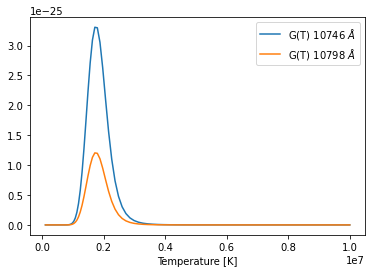

In [14]:
plt.figure()
plt.plot(temps,intensities[0,:] / (edens * 0.85*edens) ,label = r'G(T) 10746 $\AA$')
plt.plot(temps,intensities[1,:] / (edens * 0.85*edens) ,label = r'G(T) 10798 $\AA$')
plt.xlabel('Temperature [K]')
plt.legend()

## Calculate density dependent contribution function 

And now the density dependent contribution function for both 10746 and 10798 with units: 

photons cm$^{+3}$ s$^{-1}$ arcsec$^{-2}$

In [15]:
etemp = fe13.get_maxtemp() 
ht    = 0.1                ## solar radius units above the photosphere 
thetab = 0.                ## degrees 
densities = 10.**np.linspace(6.,12,50)
intensities = np.zeros((2,len(densities)))
alignments = np.zeros((2,len(densities)))

for d,edens in enumerate(densities):
    fe13.calc_rho_sym(edens,etemp,ht, thetab, include_limbdark=True, include_protons=True)
    intensities[0,d] = fe13.calc_Iemiss(10746.)
    intensities[1,d] = fe13.calc_Iemiss(10798.)
    alignments[0,d] = fe13.get_upper_level_alignment(10746.)
    alignments[1,d] = fe13.get_upper_level_alignment(10798.)

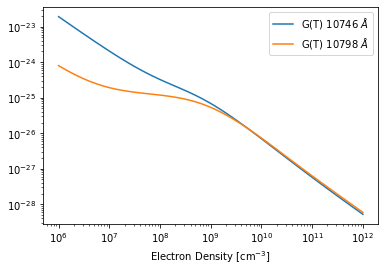

In [16]:
plt.figure()
plt.plot(densities,intensities[0,:] / (densities * 0.85*densities) ,label = r'G(T) 10746 $\AA$')
plt.plot(densities,intensities[1,:] / (densities * 0.85*densities) ,label = r'G(T) 10798 $\AA$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Electron Density [cm$^{-3}$]')
plt.legend()

## Line ratio density dependence for Fe 13 10747 and 10798

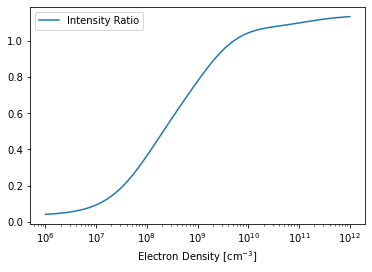

In [17]:
plt.figure()
plt.plot(densities,intensities[1,:] / intensities[0,:] ,label = r'Intensity Ratio')
plt.xscale('log')
plt.xlabel('Electron Density [cm$^{-3}$]')
plt.legend()

## Atomic alignments versus density 

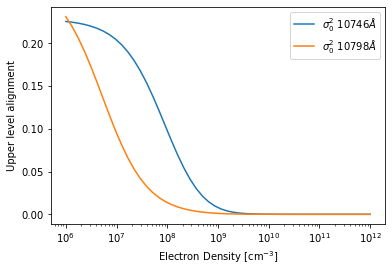

In [18]:
plt.figure()
plt.plot(densities,alignments[0,:] ,label = r'$\sigma_0^2$ $10746 \AA$')
plt.plot(densities,alignments[1,:] ,label = r'$\sigma_0^2$ $10798 \AA$')
plt.xscale('log')
plt.xlabel('Electron Density [cm$^{-3}$]')
plt.ylabel('Upper level alignment')
plt.legend()